In [45]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Function to query the GBIF Literature API
def query_gbif_literature(doi):
    url = f"https://api.gbif.org/v1/literature/search?doi={doi}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error querying DOI {doi}: {response.status_code}")
        return None

# Function to process the API response and extract topics
def extract_topics(data):
    topics = []
    if data and 'results' in data and len(data['results']) > 0:
        for result in data['results']:
            if 'topics' in result and result['topics']:
                topics.extend(result['topics'])
            else:
                print(f"No topics found in result: {result}")
    else:
        print("No results found or data is None")
    return topics

# Path to the CSV file
file_path = r'D:\gbif_outputs\allDOIs.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Extract DOIs as a list
dois = df['DOI'].tolist()


In [46]:
# Initialize a dictionary to hold topic counts and co-occurrences
topic_counts = {}
topic_cooccurrences = {}

# Process each DOI with a progress bar
for doi in tqdm(dois, desc="Processing DOIs"):
    data = query_gbif_literature(doi)
    topics = extract_topics(data)
    
    if not topics:
        print(f"No topics extracted for DOI: {doi}")
        continue
    
    # Update topic counts
    for topic in topics:
        topic_upper = topic.upper()
        if topic_upper in topic_counts:
            topic_counts[topic_upper] += 1
        else:
            topic_counts[topic_upper] = 1
    
    # Handle single topic case
    if len(topics) == 1:
        continue
    
    # Update topic co-occurrences
    for i in range(len(topics)):
        for j in range(i + 1, len(topics)):
            pair = tuple(sorted([topics[i].upper(), topics[j].upper()]))
            if pair in topic_cooccurrences:
                topic_cooccurrences[pair] += 1
            else:
                topic_cooccurrences[pair] = 1


Processing DOIs:   0%|          | 0/3214 [00:00<?, ?it/s]

No results found or data is None
No topics extracted for DOI: 10.1111/2041-210X.13857
No results found or data is None
No topics extracted for DOI: 0046739-181108115102211
No topics found in result: {'discovered': '2015-12-09', 'authors': [{'firstName': 'Daniel', 'lastName': 'Edler'}, {'firstName': 'Thaís', 'lastName': 'Guedes'}, {'firstName': 'Alexander', 'lastName': 'Zizka'}, {'firstName': 'Martin', 'lastName': 'Rosvall'}, {'firstName': 'Alexandre', 'lastName': 'Antonelli'}], 'countriesOfCoverage': [], 'countriesOfResearcher': ['SE', 'BR'], 'added': '2020-11-24T15:49:45.806+00:00', 'published': '2016-10-01T00:00:00.000+00:00', 'day': 1, 'gbifDownloadKey': ['0009289-151016162008034'], 'gbifOccurrenceKey': [], 'gbifTaxonKey': [], 'gbifHigherTaxonKey': [], 'gbifNetworkKey': ['99d66b6c-9087-452f-a9d4-f15f2c2d0e7e', '379a0de5-f377-4661-9a30-33dd844e7b9a', '17abcf75-2f1e-46dd-bf75-a5b21dd02655', '8534dd20-c368-4a1f-bdaf-e6b390710f89', '1f2c0cbe-40df-43f6-ba07-e76133e78c31', '2ee1bff7-0b34-

No results found or data is None
No topics extracted for DOI:  au N de Fiserenamasay"
No topics found in result: {'discovered': '2022-06-23', 'authors': [{'firstName': 'Emily K', 'lastName': 'Latch'}, {'firstName': 'Xueling', 'lastName': 'Yi'}], 'countriesOfCoverage': [], 'countriesOfResearcher': ['US'], 'added': '2022-06-23T14:12:01.635+00:00', 'published': '2022-04-26T00:00:00.000+00:00', 'day': 26, 'gbifDownloadKey': [], 'gbifOccurrenceKey': [], 'gbifTaxonKey': [], 'gbifHigherTaxonKey': [], 'gbifNetworkKey': [], 'gbifProjectIdentifier': [], 'gbifProgramme': [], 'citationType': 'DOI', 'gbifRegion': [], 'id': 'e976713a-5d61-3859-95ea-724cfc49735c', 'identifiers': {'doi': '10.1111/jbi.14362'}, 'keywords': ['Eptesicus', 'climate change', 'cytonuclear discordance', 'demographic modelling', 'population genetics', 'refugia', 'species distribution'], 'language': 'eng', 'literatureType': 'JOURNAL', 'month': 4, 'notes': '10.13039/100012454', 'openAccess': False, 'peerReview': True, 'publisher

No topics found in result: {'authors': [{'firstName': 'César R.', 'lastName': 'Luque-Fernández'}, {'firstName': 'Luis Norberto', 'lastName': 'Villegas Paredes'}], 'countriesOfCoverage': [], 'countriesOfResearcher': ['PE'], 'added': '2020-11-24T15:50:33.676+00:00', 'published': '2017-04-05T00:00:00.000+00:00', 'day': 5, 'gbifDownloadKey': ['0014483-160910150852091'], 'gbifOccurrenceKey': [], 'gbifTaxonKey': [], 'gbifHigherTaxonKey': [], 'gbifNetworkKey': ['99d66b6c-9087-452f-a9d4-f15f2c2d0e7e', '17abcf75-2f1e-46dd-bf75-a5b21dd02655', '1f2c0cbe-40df-43f6-ba07-e76133e78c31'], 'gbifProjectIdentifier': [], 'gbifProgramme': [], 'citationType': 'generic', 'gbifRegion': [], 'id': '393fb86d-8b09-347f-a41d-6d3b3bec4278', 'identifiers': {'issn': '1809-127X', 'doi': '10.15560/13.2.2085'}, 'keywords': [], 'language': 'eng', 'literatureType': 'JOURNAL', 'month': 4, 'openAccess': True, 'peerReview': True, 'publisher': 'Pensoft Publishers', 'relevance': ['GBIF_USED'], 'source': 'Check List', 'tags': [

No topics found in result: {'discovered': '2016-07-07', 'authors': [{'firstName': 'Gunnar', 'lastName': 'Keppel'}, {'firstName': 'Thomas W.', 'lastName': 'Gillespie'}, {'firstName': 'Paul', 'lastName': 'Ormerod'}, {'firstName': 'Geoffrey A.', 'lastName': 'Fricker'}], 'countriesOfCoverage': ['WS', 'FJ', 'NC', 'CK', 'SB', 'TO', 'VU', 'NU'], 'countriesOfResearcher': ['US', 'AU'], 'added': '2020-11-24T15:53:52.810+00:00', 'published': '2016-06-01T00:00:00.000+00:00', 'gbifDownloadKey': ['0002534-160118175350007', '0002540-160118175350007', '0002536-160118175350007', '0002537-160118175350007', '0002541-160118175350007', '0002543-160118175350007', '0002538-160118175350007', '0002535-160118175350007', '0002542-160118175350007'], 'gbifOccurrenceKey': [], 'gbifTaxonKey': [], 'gbifHigherTaxonKey': [], 'gbifNetworkKey': ['99d66b6c-9087-452f-a9d4-f15f2c2d0e7e', '17abcf75-2f1e-46dd-bf75-a5b21dd02655', '3aee7756-565e-4dc5-b22c-f997fbd7105c'], 'gbifProjectIdentifier': [], 'gbifProgramme': [], 'citati

No topics found in result: {'discovered': '2021-10-26', 'authors': [{'firstName': 'Thomas', 'lastName': 'Denk'}, {'firstName': 'H. Tuncay', 'lastName': 'Güner'}, {'firstName': 'Johannes M.', 'lastName': 'Bouchal'}], 'countriesOfCoverage': [], 'countriesOfResearcher': [], 'added': '2021-11-08T11:31:56.281+00:00', 'published': '2021-10-25T00:00:00.000+00:00', 'day': 25, 'gbifDownloadKey': ['0343938-200613084148143'], 'gbifOccurrenceKey': [], 'gbifTaxonKey': [1596254], 'gbifHigherTaxonKey': [1, 1596253, 54, 216, 3338, 811], 'gbifNetworkKey': ['17abcf75-2f1e-46dd-bf75-a5b21dd02655'], 'gbifProjectIdentifier': [], 'gbifProgramme': [], 'citationType': 'DOI', 'gbifRegion': [], 'id': 'd6a560f4-113a-322d-b00e-b520e27afb1f', 'identifiers': {'doi': '10.1016/j.revpalbo.2021.104550'}, 'keywords': ['CLAMP', 'Early Miocene', 'Leaf assemblage', 'Palaeoenvironment', 'Taphonomy', 'Taxonomy'], 'language': 'eng', 'literatureType': 'JOURNAL', 'month': 10, 'notes': '10.13039/501100017481;10.13039/50110000435

No topics found in result: {'discovered': '2023-06-10', 'authors': [{'firstName': 'David A.', 'lastName': 'Moo-Llanes'}, {'firstName': 'Sokani', 'lastName': 'Sánchez-Montes'}, {'firstName': 'Teresa', 'lastName': 'López-Ordoñez'}, {'firstName': 'Karla', 'lastName': 'Dzul-Rosado'}, {'firstName': 'Daniela', 'lastName': 'Segura-Trejo'}, {'firstName': 'Beatriz', 'lastName': 'Salceda-Sánchez'}, {'firstName': 'Rogelio', 'lastName': 'Danis-Lozano'}], 'countriesOfCoverage': ['MX'], 'countriesOfResearcher': ['MX'], 'added': '2023-06-15T09:49:17.593+00:00', 'published': '2023-06-05T00:00:00.000+00:00', 'day': 5, 'gbifDownloadKey': ['0251839-220831081235567'], 'gbifOccurrenceKey': [], 'gbifTaxonKey': [2183597], 'gbifHigherTaxonKey': [1, 1425, 2183844, 54, 367, 9167], 'gbifNetworkKey': ['99d66b6c-9087-452f-a9d4-f15f2c2d0e7e'], 'gbifProjectIdentifier': ['SNIB-HA006-HA0061301F_corregida-ND', 'SNIB-CC008-CC0081103F_corregida-ND', 'SNIB-LE002-LE0021910F_AA_IX_PE_SIB2020.04.21-ácaros'], 'gbifProgramme':

No topics found in result: {'discovered': '2017-06-27', 'authors': [{'firstName': 'Natasha D.', 'lastName': 'Phillips'}, {'firstName': 'Neil', 'lastName': 'Reid'}, {'firstName': 'Tierney', 'lastName': 'Thys'}, {'firstName': 'Chris', 'lastName': 'Harrod'}, {'firstName': 'Nicholas L.', 'lastName': 'Payne'}, {'firstName': 'Cheryl A.', 'lastName': 'Morgan'}, {'firstName': 'Hannah J.', 'lastName': 'White'}, {'firstName': 'Siobh?n', 'lastName': 'Porter'}, {'firstName': 'Jonathan D.R.', 'lastName': 'Houghton'}], 'countriesOfCoverage': [], 'countriesOfResearcher': ['IE', 'CL', 'US', 'GB'], 'added': '2020-11-24T15:47:22.777+00:00', 'published': '2017-06-19T00:00:00.000+00:00', 'day': 19, 'gbifDownloadKey': ['0018725-151016162008034'], 'gbifOccurrenceKey': [], 'gbifTaxonKey': [], 'gbifHigherTaxonKey': [], 'gbifNetworkKey': ['99d66b6c-9087-452f-a9d4-f15f2c2d0e7e', '17abcf75-2f1e-46dd-bf75-a5b21dd02655', '1f2c0cbe-40df-43f6-ba07-e76133e78c31', '2b7c7b4f-4d4f-40d3-94de-c28b6fa054a6'], 'gbifProjectI

In [42]:
# Step 3: Create the Network Graph
G = nx.Graph()

# Add nodes with size based on topic counts and include count as an attribute
for topic, count in topic_counts.items():
    G.add_node(topic, size=count, count=count)

# Add edges with weight based on co-occurrences
for pair, weight in topic_cooccurrences.items():
    G.add_edge(pair[0], pair[1], weight=weight)

In [43]:
# Export the network to GraphML
nx.write_graphml(G, "topic_network.graphml")

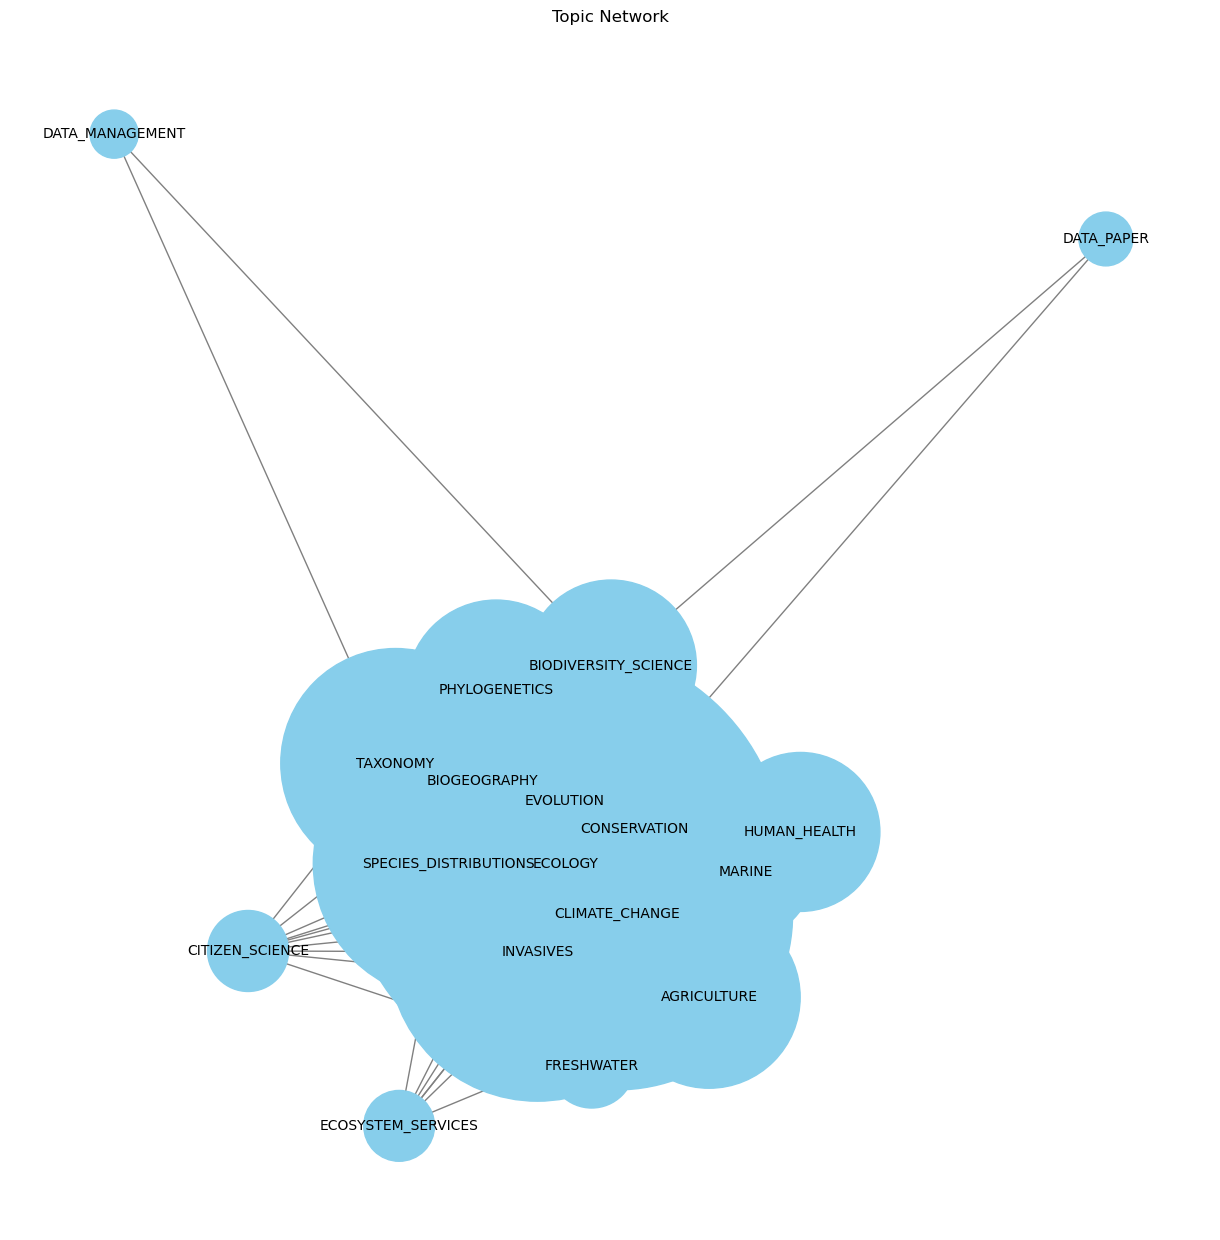

In [44]:
# Step 5: Visualize the Network (Optional)
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)
sizes = [G.nodes[node]['size'] * 100 for node in G.nodes]  # Adjust multiplier as needed for better visualization
nx.draw(G, pos, with_labels=True, node_size=sizes, font_size=10, node_color="skyblue", edge_color="gray")
plt.title("Topic Network")
plt.show()